<a href="https://colab.research.google.com/github/xiaoyi-yuxiao/python-code-for-FinancialAnalysis-book/blob/master/20200530_8_pm_Chapter3_return_histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

In [ ]:
pip install requests

In [ ]:
pip install bs4

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt#get current date
import requests
from bs4 import BeautifulSoup
from google.colab import files

In [ ]:
#beautifulsoup is used web scrape URL
#return html
def html_beautifulsoup(url):
    response = requests.get(url)
    html = response.content

    #beautifulsoup html will not look like soure
    #review beautifulsoup html to use find and findall
    soup = BeautifulSoup(html,"lxml")
    return soup

#soup_html: soup html is not same as source html
def yahoo_description(soup_html):
    element = soup_html.find('h1',class_='D(ib) Fz(16px) Lh(18px)')
    return element.text  

In [ ]:
# this function is to fetch the stock info and data and then plot it
def graph_return(Ticker, time_interval, start_t, end_t): 
  Data=yf.download(Ticker,start=start_t,end=end_t,interval = time_interval)
  Adjclose=Data['Adj Close']
  Dr = Adjclose.dropna()
  R=Dr.pct_change()[1:]
 
  soup_html = html_beautifulsoup("https://finance.yahoo.com/quote/"  + Ticker) 

  fig = plt.figure(figsize=(20,10))

  #graph chart
  ax1 = fig.add_subplot(111)
  (counts, bins, patch)=ax1.hist(R, bins=20)
  ax1.set_xlabel('Rate of Return')
  ax1.set_ylabel('Frequency')
  ax1.legend([Ticker])
  ax2 = ax1.twinx()  # set another Y axis with label
  pct_counts = counts/sum(counts) # calculate the percent change count
  Cum_sum = np.cumsum(pct_counts)# calculate cumulative percent change
  ax2.plot(bins[1:],Cum_sum,'r') # set the bins 
  ax2.set_ylim([0, 1]) #set the scale of the right Y-axis
  ax2.set_ylabel('Cumulative %') 
  plt.title(start_t+' to '+end_t,fontsize=16)#set font here
  plt.suptitle(yahoo_description(soup_html),fontsize=18) 
  print("")
  plt.show()

  # print data set
  Dr = Dr.round(2) # Dr is a series not a dataframe
  data = pd.concat([Dr,R],axis=1)
  data.columns =['Adjclose','Rate of return']
  data = data.sort_values(by='Date', ascending=False)
  pd.set_option('display.max_rows', None)
  print("")
  print(data)

data.to_csv('histogram.csv') 
files.download('histogram.csv')

In [ ]:
data.to_csv('histogram.csv') 
files.download('histogram.csv')

NameError: ignored

Please enter ticker(Default = JNJ)-->
Enter start date(Default = 5 Years ago, 2015-07-11)-->
Enter end date(Default = Yesterday, 2020-07-08)-->
Enter date interval(1d,1wk,1mo Default = 1wk)-->

[*********************100%***********************]  1 of 1 completed



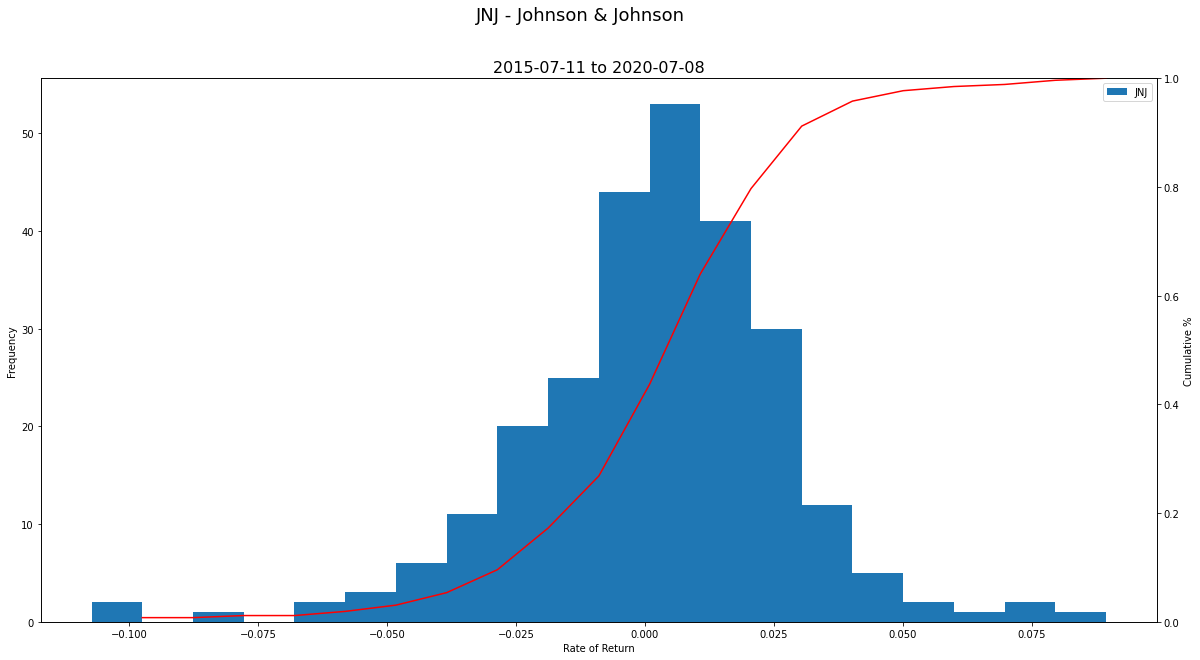


            Adjclose  Rate of return
Date                                
2020-07-06    142.85        0.013336
2020-06-29    140.97        0.022930
2020-06-22    137.81       -0.041855
2020-06-15    143.83        0.011819
2020-06-08    142.15       -0.034963
2020-06-01    147.30       -0.009748
2020-05-25    148.75        0.037481
2020-05-18    143.38       -0.040348
2020-05-11    149.40        0.011701
2020-05-04    147.68        0.002765
2020-04-27    147.27       -0.042425
2020-04-20    153.79        0.018682
2020-04-13    150.97        0.076400
2020-04-06    140.26        0.052620
2020-03-30    133.25        0.089396
2020-03-23    122.31        0.027275
2020-03-16    119.06       -0.107231
2020-03-09    133.37       -0.054496
2020-03-02    141.05        0.062877
2020-02-24    132.71       -0.103048
2020-02-17    147.95       -0.001332
2020-02-10    148.15       -0.011587
2020-02-03    149.89        0.020286
2020-01-27    146.91        0.003708
2020-01-20    146.37       -0.005698


In [ ]:
#initialize dates
previousday = dt.date.today()-dt.timedelta(days=1)# get the date of previous day
Default_end = previousday.strftime("%Y-%m-%d") # change the format of the default datetime 
years_ago = dt.date.today()-dt.timedelta(days=5 * 365)
Default_start = years_ago.strftime("%Y-%m-%d")

# request user input
# set default values if users does not enter a value
Ticker = input('Please enter ticker(Default = JNJ)-->') or 'JNJ'
Start = input('Enter start date(' + 'Default = 5 Years ago, ' + Default_start + ')-->') or Default_start
End = input('Enter end date(Default = Yesterday, ' + Default_end + ')-->') or Default_end
T_interval = input('Enter date interval(1d,1wk,1mo Default = 1wk)-->') or '1wk'

print("")

graph_return(Ticker, T_interval,Start,End)


print("")
print("")